In [24]:
import pandas as pd
import numpy as np

In [26]:
comment_sentiment = pd.read_csv("https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv")
comment_sentiment.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


The data is multi-class classification dataset i.e., -1, 0, 1.

In [32]:
# Let's take a random sample from the clean comment.
comment_sentiment.sample()['clean_comment'].values

array(['your questions are absolutely ridiculous and shows how out touch with reality you are the world not all black and white just because someone votes for support particular party doesn mean they hate the others definitely don hate aap don like their solutions problems and don care for their style politics don see how anyone can logically expect adding more bureaucracy lokpal solve the problem corruption that was created too much bureaucracy begin with similarly their election promises free water and cheap electricity everyone what one the richest cities the country backward step when should moving away from govt subsidies for everyone all means support the poorest the poor with all the subsidies the world but there reason why the govt should lose money powering the air conditioned bungalows the super rich delhi the poor barely have any electric appliances this country the only way they are going able pay for such subsidies increasing tax revenues which will primarily impact busine

In [33]:
comment_sentiment.shape

(37249, 2)

In [34]:
comment_sentiment.isnull().sum()

,0
clean_comment,100
category,0


In [35]:
comment_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [36]:
comment_sentiment[comment_sentiment['clean_comment'].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [42]:
# Null values present in the category column.
comment_sentiment[comment_sentiment['clean_comment'].isna()]['category'].value_counts()

,count
category,
0,100


In [43]:
# since we have an more than 37k rows of the data values so no effect on dropping the 100 rows.
comment_sentiment.dropna(inplace=True)

In [44]:
comment_sentiment.isnull().sum()

,0
clean_comment,0
category,0


In [45]:
comment_sentiment.duplicated().sum()

350

In [47]:
# Fetching the duplicated rows of the data.
comment_sentiment[comment_sentiment.duplicated()]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [48]:
# Dropping the duplicated values as well.
comment_sentiment.drop_duplicates(inplace=True)

In [49]:
comment_sentiment.duplicated().sum()

0

In [50]:
# Checking rows where there are just space instead of values.
comment_sentiment[comment_sentiment['clean_comment'].str.strip() == '']

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [52]:
comment_sentiment = comment_sentiment[~(comment_sentiment['clean_comment'].str.strip() == '')]

In [54]:
comment_sentiment.shape

(36793, 2)

In [57]:
# Convert the 'clean_comment' column to lowercase.
comment_sentiment['clean_comment'] = comment_sentiment['clean_comment'].str.lower()

#
comment_sentiment.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [68]:
# Fetching all the values which have `trailing whitespaces` means some blank spaces at the begining of the text and ending of the text.
comment_sentiment[comment_sentiment['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [72]:
# Now, Removing the `Trailing` and `Leading` whitespaces from the 'clean_comment' column.
comment_sentiment['clean_comment'] = comment_sentiment['clean_comment'].str.strip()

# Cross-Verification.
comment_sentiment['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum()

0

In [73]:
# Identifying the URLs if there is present in the text.
import re

url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comment_with_urls = comment_sentiment[comment_sentiment['clean_comment'].str.contains(url_pattern, regex=True)]

# Displays the comments that contains URLs.
comment_with_urls.head(5)

,clean_comment,category


`Observation:`

There are not even a single values which have `urls` in the comments.

In [77]:
# Identifying the comment which contains the new line characters.
comment_with_new_line = comment_sentiment[comment_sentiment['clean_comment'].str.contains("\n")]

#
comment_with_new_line.shape

(204, 2)

`Observation:`

There are altogether `204` rows of the data values where there are `\n` values.

In [79]:
# Removing the newline characters from the 'clean_comment' column.
comment_sentiment['clean_comment'] = comment_sentiment['clean_comment'].str.replace("\n", ' ', regex=True)

# Cross Verification.
comment_with_newline_remaining = comment_sentiment[comment_sentiment['clean_comment'].str.contains("\n")]
comment_with_newline_remaining

,clean_comment,category


In [86]:
comment_sentiment['clean_comment'][4]

'for your own benefit you may want read living buddha living christ thich nhat hanh you might find any subsequent discussions with your loved ones easier you are able articulate some the parallels that exist between buddhism and christianity don surprised they react negatively for having lost you treat them with compassion and deserved understanding although they may indeed display signs being hurt your new path properly sharing with them way that may alleviate their fear something they may perceive wrong the very least alien their beliefs may help allowing them the long run accept although not necessarily agree with your decision regardless where they end you have make your own way'

In [87]:
comment_sentiment.head()

,clean_comment,category
0,family mormon have never tried explain them th...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


## **EDA**

<Axes: xlabel='category', ylabel='count'>

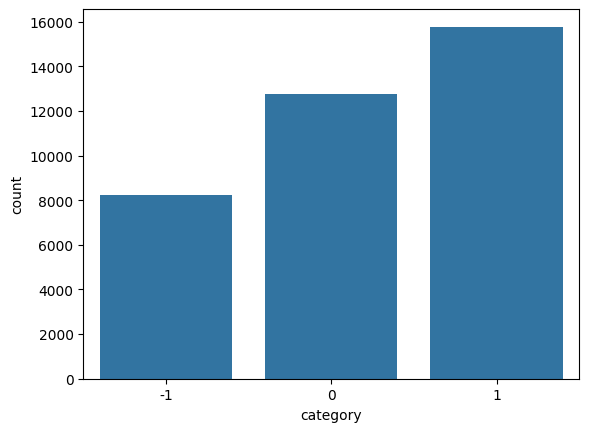

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identifying the distribution of the class.
sns.countplot(data=comment_sentiment, x='category')

Observation:

From the above distribution, we can see that, there is imbalanced in the above dataset which may affects the model prediction and bias.

In [96]:
# Frequency distribution of sentiments.
comment_sentiment['category'].value_counts(normalize=True).mul(100).round(2)

,proportion
category,
1,42.86
0,34.71
-1,22.42


In [105]:
# Counting the Word.
comment_sentiment['word_count'] = comment_sentiment['clean_comment'].apply(lambda x: len(x.split()))

In [107]:
comment_sentiment.head(5)

,clean_comment,category,word_count
0,family mormon have never tried explain them th...,1,39
1,buddhism has very much lot compatible with chr...,1,196
2,seriously don say thing first all they won get...,-1,86
3,what you have learned yours and only yours wha...,0,29
4,for your own benefit you may want read living ...,1,112


In [108]:
#
comment_sentiment['word_count'].describe()

,word_count
count,36793.000000
mean,29.667464
std,56.790738
min,1.000000
25%,6.000000
50%,13.000000
75%,30.000000
max,1307.000000


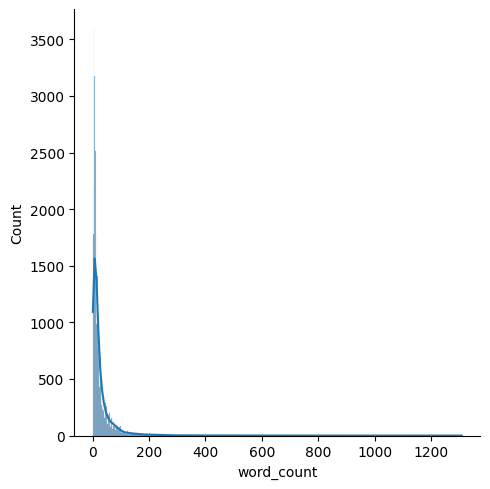

In [114]:
# Plotting the distribution of the `word_count`.
sns.displot(comment_sentiment['word_count'], kde=True)

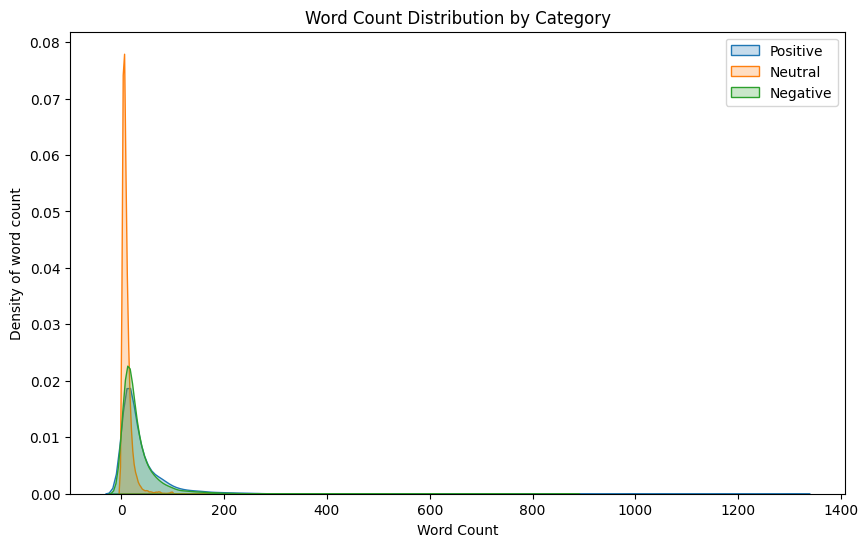

In [116]:
# Plotting the word distribution by category.

# Creating a figure and axes.
plt.figure(figsize=(10, 6))

# Plot KDE for category 1.
category_1 = comment_sentiment[comment_sentiment['category'] == 1]['word_count']
sns.kdeplot(category_1, label='Positive', fill=True)

# Plot KDE for category 2.
category_2 = comment_sentiment[comment_sentiment['category'] == 0]['word_count']
sns.kdeplot(category_2, label='Neutral', fill=True)

# Plot KDE for category 3.
category_3 = comment_sentiment[comment_sentiment['category'] == -1]['word_count']
sns.kdeplot(category_3, label='Negative', fill=True)

# Adding title and labels.
plt.title("Word Count Distribution by Category")
plt.xlabel("Word Count")
plt.ylabel("Density of word count")

# Adding an legend.
plt.legend()

# Showing the plot.
plt.show()

`Observation:`

`Positive Comments (category 1):` These tend to have a wider spread in word count, indicating that longer comments are more common in positive sentiments.

`Neutral Comments (category 0):` The distribution shows a relatively lower frequency and is more concentrated around shorter comments compared to positive or negative ones.

`Negative Comments (category -1):` These comments have a distribution somewhat similar to positive comments but with a smaller proportion of longer comments.

<Axes: ylabel='word_count'>

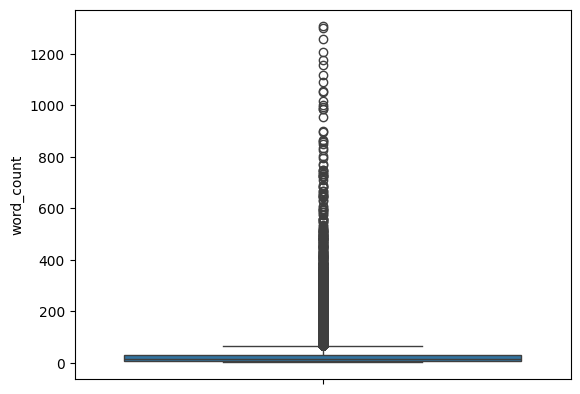

In [118]:
sns.boxplot(comment_sentiment['word_count'])

<ipython-input-125-3d322efca40d>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


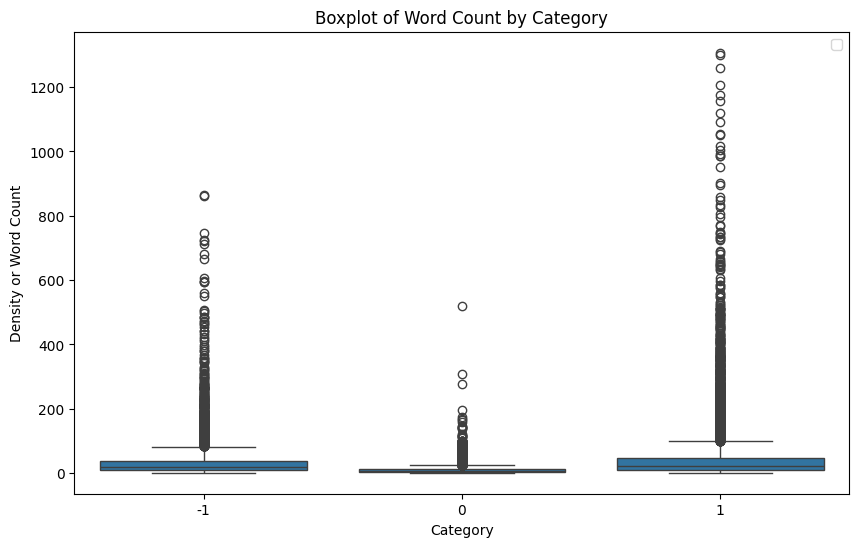

In [125]:
# Creating a boxplot of Word Count by Category.
plt.figure(figsize=(10, 6))
sns.boxplot(data=comment_sentiment, x='category', y='word_count')
plt.title("Boxplot of Word Count by Category")
plt.xlabel("Category")
plt.ylabel("Density or Word Count")
plt.legend()
plt.show()

`Positive comments (category 1):` The median word count is relatively high, and there are several outliers with longer comments, indicating that positive comments tend to be more verbose.

`Neutral comments (category 0):` The median word count is the lowest, with a tighter interquartile range (IQR), suggesting that neutral comments are generally shorter.

`Negative comments (category -1):` The word count distribution is similar to positive comments but with a slightly lower median and fewer extreme outliers.




<ipython-input-126-e3a00cb3abe2>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


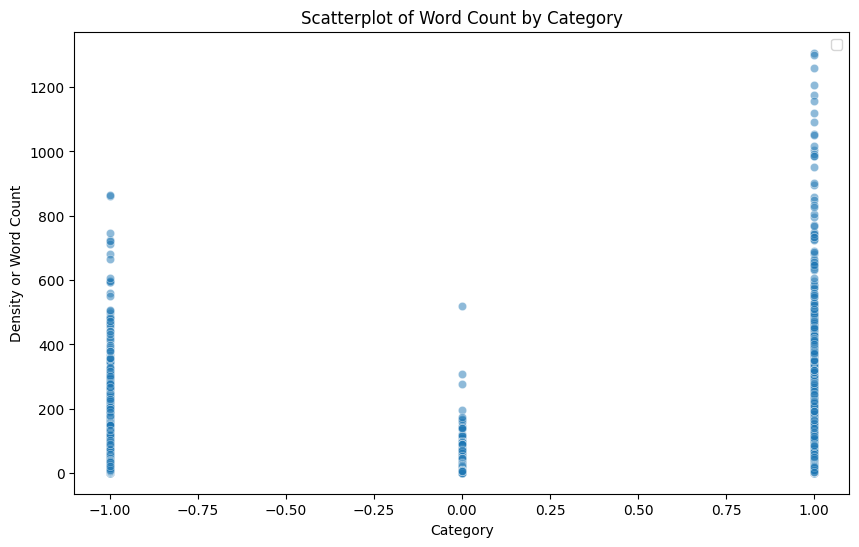

In [126]:
# Creating a scatterplot between 'category' and 'wordcount'.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=comment_sentiment, x='category', y='word_count', alpha=0.5)
plt.title("Scatterplot of Word Count by Category")
plt.xlabel("Category")
plt.ylabel("Density or Word Count")
plt.legend()
plt.show()

<Axes: xlabel='category', ylabel='word_count'>

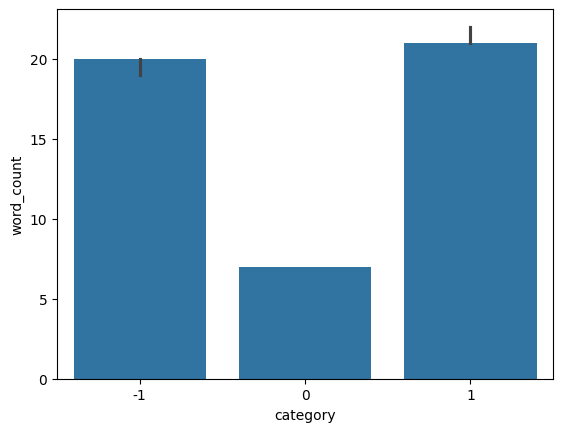

In [128]:
# Median word counts among sentiments.
sns.barplot(comment_sentiment, x='category', y='word_count', estimator='median')

In [129]:
!pip install nltk

## **Removing stop-words.**

In [132]:
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

# Define the list of English stopwords.
stop_words = set(stopwords.words('english'))

# Create a new column 'num_stop_words' by counting the number of stopwords in each comment.
comment_sentiment['num_stop_words'] = comment_sentiment['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [133]:
comment_sentiment.sample(5)

,clean_comment,category,word_count,num_stop_words
3590,these two finally met,0,4,1
7864,much applauding and standing ovation this comm...,1,9,2
34837,you are actually surprised these low life’ did...,-1,24,12
972,biggest voting brigade here set india mods the...,0,8,2
15177,whom are you going vote not lot options left o...,0,11,6


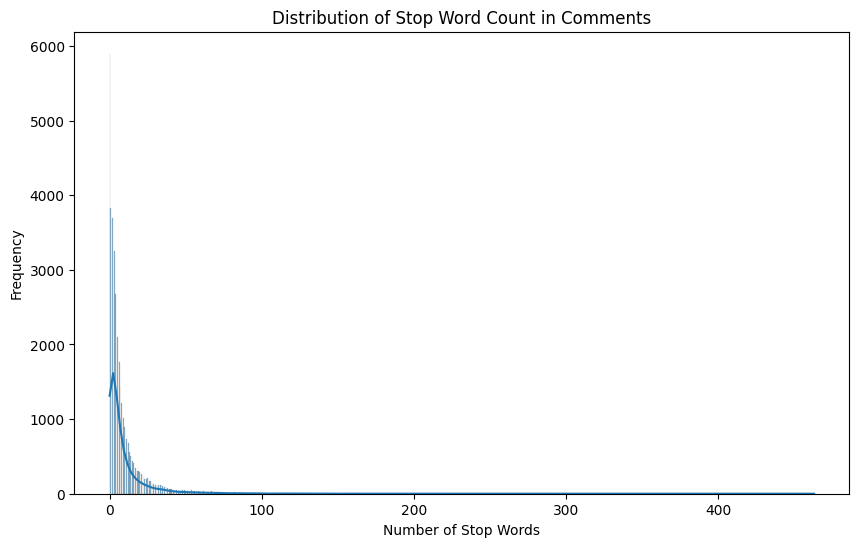

In [141]:
# Creating the distribution plot (displot) for the `num_stop_words` column.
plt.figure(figsize=(10, 6))
sns.histplot(comment_sentiment['num_stop_words'], kde=True)
plt.title('Distribution of Stop Word Count in Comments')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()

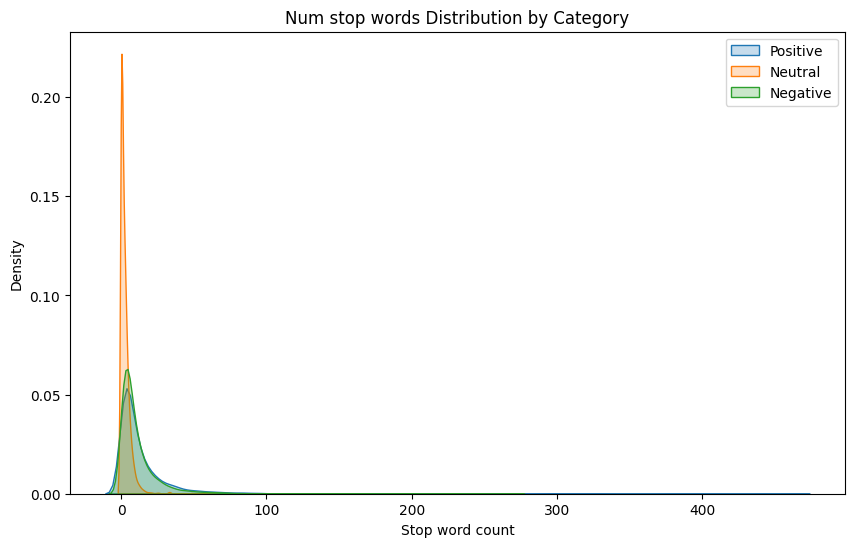

In [142]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(comment_sentiment[comment_sentiment['category'] == 1]['num_stop_words'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(comment_sentiment[comment_sentiment['category'] == 0]['num_stop_words'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(comment_sentiment[comment_sentiment['category'] == -1]['num_stop_words'], label='Negative', fill=True)

# Add title and labels
plt.title('Num stop words Distribution by Category')
plt.xlabel('Stop word count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

<Axes: xlabel='category', ylabel='num_stop_words'>

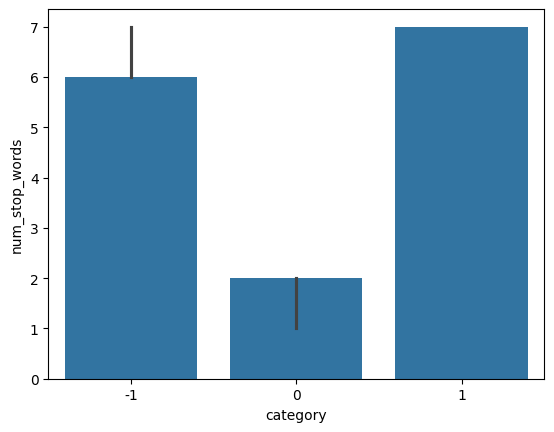

In [145]:
# Median Word counts among sentiments.
sns.barplot(comment_sentiment, x='category', y='num_stop_words', estimator='median')

<ipython-input-150-71f4dbc606cd>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_df, x='count', y='stop_word',palette='viridis')


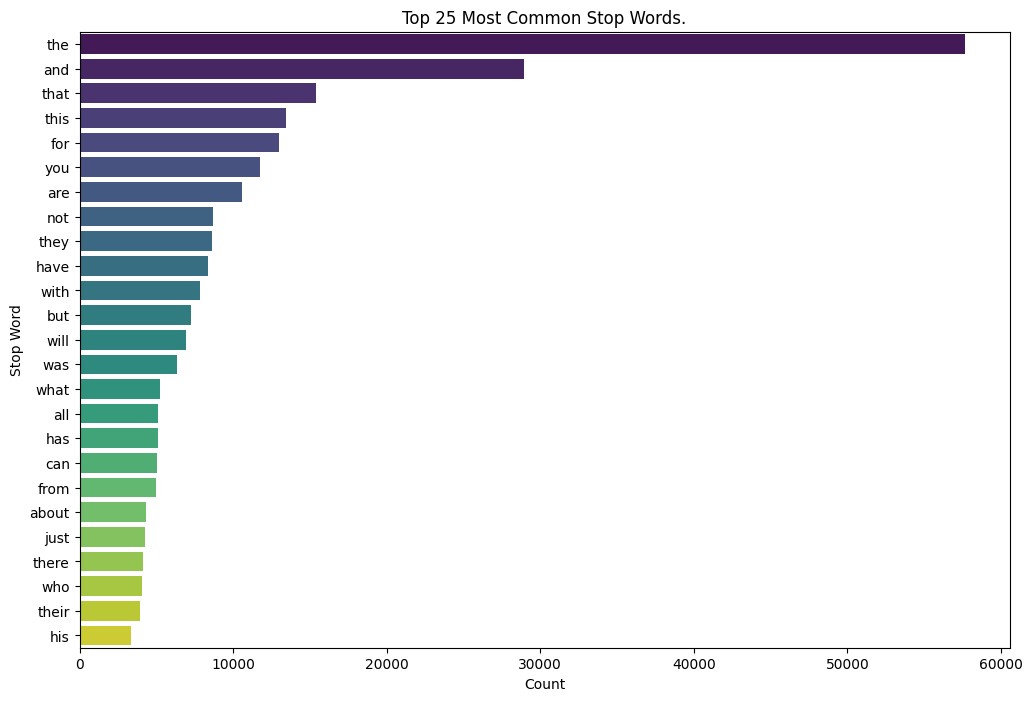

In [150]:
# Create a frequency distribution of stopwords in the `clean_comment` column.
from collections import Counter

# First, Extract all the stop words from the comments using the previously defined `common_stopwords`.
# all_stop_words = []
# for comment in comment_sentiment['clean_comment']:
#     for word in comment.split():
#         if word in stop_words:
#             all_stop_words.append(word)

# One line statement of the above code.
all_stop_words = [word for comment in comment_sentiment['clean_comment'] for word in comment.split() if word in stop_words ]

# Count the most common stop words.
most_commom_stop_words = Counter(all_stop_words).most_common(25)

# Convert the most common stop words to a DataFrame for plotting.
top_25_df = pd.DataFrame(most_commom_stop_words, columns=['stop_word', 'count'])

# Create the barplot for the top 25 most common stop words.
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_df, x='count', y='stop_word',palette='viridis')
plt.title('Top 25 Most Common Stop Words.')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()

In [151]:
# Number of characters in the text.
comment_sentiment['num_characters'] = comment_sentiment['clean_comment'].apply(len)
comment_sentiment.head(4)

,clean_comment,category,word_count,num_stop_words,num_characters
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167


In [152]:
comment_sentiment['num_characters'].describe()

,num_characters
count,36793.000000
mean,181.852798
std,359.702163
min,1.000000
25%,38.000000
50%,80.000000
75%,184.000000
max,8664.000000


In [156]:
from collections import Counter

# Combine all comments into one large string.
all_text = ' '.join(comment_sentiment['clean_comment'])

# Count the frequency of each characters.
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display.
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

char_frequency_df.head()

,character,frequency
6,,1091592
12,e,666610
13,t,491287
1,a,481134
3,i,401388


In [157]:
char_frequency_df['character'].values

array([' ', 'e', 't', ..., '援', '哭', '悼'], dtype=object)

In [159]:
# Create a new column 'num_punctuation_chars' to count punctuation characters in each comment.
comment_sentiment['num_punctuation_chars'] = comment_sentiment['clean_comment'].apply(lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-']))

comment_sentiment.sample(5)

,clean_comment,category,word_count,num_stop_words,num_characters,num_punctuation_chars
37077,nevermind the commentary good article for dece...,1,10,3,68,0
6155,wtf with the election trends different channel...,-1,23,6,132,0
35448,already have the modi multibit and the valhall...,0,22,9,135,0
8187,bjp deciding walk away from understanding prob...,0,13,3,86,0
3458,frankly don even get your logic the practice d...,1,42,15,241,0


In [160]:
comment_sentiment['num_punctuation_chars'].describe()

,num_punctuation_chars
count,36793.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


<ipython-input-166-a7dde756cdab>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')


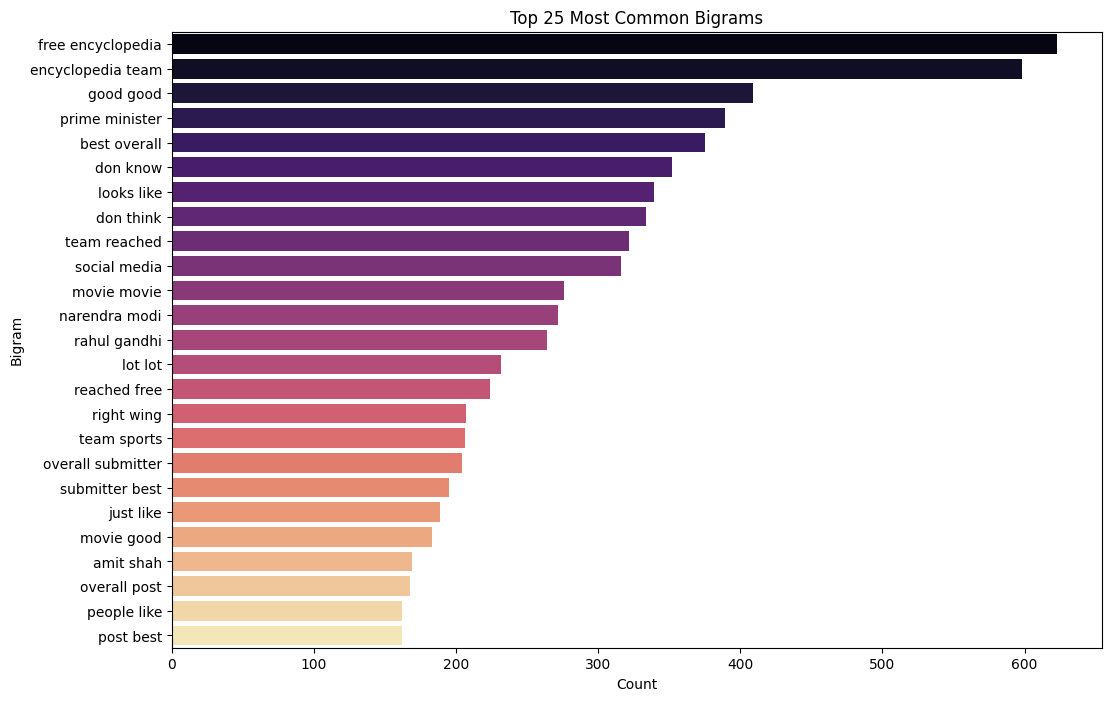

In [166]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a function to extract the top 25 bigrams
def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 bigrams
top_25_bigrams = get_top_ngrams(comment_sentiment['clean_comment'], 25)

# Convert the bigrams into a DataFrame for plotting
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])

# Plot the countplot for the top 25 bigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()


<ipython-input-168-e17ecdd6a8c2>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')


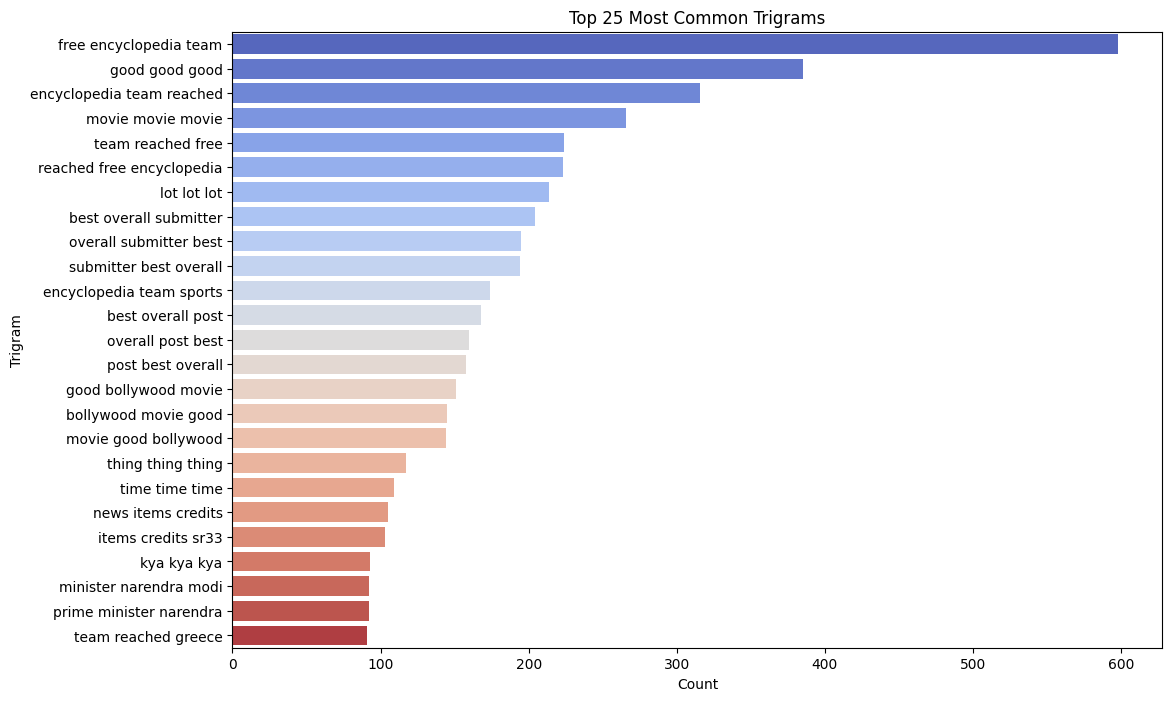

In [168]:
# Create a function to extract the top 25 trigrams
def get_top_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 trigrams
top_25_trigrams = get_top_trigrams(comment_sentiment['clean_comment'], 25)

# Convert the trigrams into a DataFrame for plotting
top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=['trigram', 'count'])

# Plot the countplot for the top 25 trigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()

In [169]:
# Remove non-English characters from the 'clean_comment' column
# Keeping only standard English letters, digits, and common punctuation
import re

comment_sentiment['clean_comment'] = comment_sentiment['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))

In [170]:
all_text = ' '.join(comment_sentiment['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

char_frequency_df

,character,frequency
6,,1091592
12,e,666610
13,t,491287
1,a,481134
3,i,401388
9,n,388465
7,o,379908
17,s,355279
8,r,331425
10,h,296748


In [171]:
comment_sentiment.head()

,clean_comment,category,word_count,num_stop_words,num_characters,num_punctuation_chars
0,family mormon have never tried explain them th...,1,39,13,259,0
1,buddhism has very much lot compatible with chr...,1,196,59,1268,0
2,seriously don say thing first all they won get...,-1,86,40,459,0
3,what you have learned yours and only yours wha...,0,29,15,167,0
4,for your own benefit you may want read living ...,1,112,45,690,0


In [172]:
from nltk.corpus import stopwords

# Defining stop words but keeping essential ones for sentiment analysis
stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

# Remove stop words from 'clean_comment' column, retaining essential ones
comment_sentiment['clean_comment'] = comment_sentiment['clean_comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)

In [173]:
comment_sentiment.head()

,clean_comment,category,word_count,num_stop_words,num_characters,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


In [174]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Define the lemmatizer.
lemmatizer = WordNetLemmatizer()

# Apply Lemmatization to the 'clean_comment_no_stopwords' column.
comment_sentiment['clean_comment'] = comment_sentiment['clean_comment'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

comment_sentiment.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,clean_comment,category,word_count,num_stop_words,num_characters,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


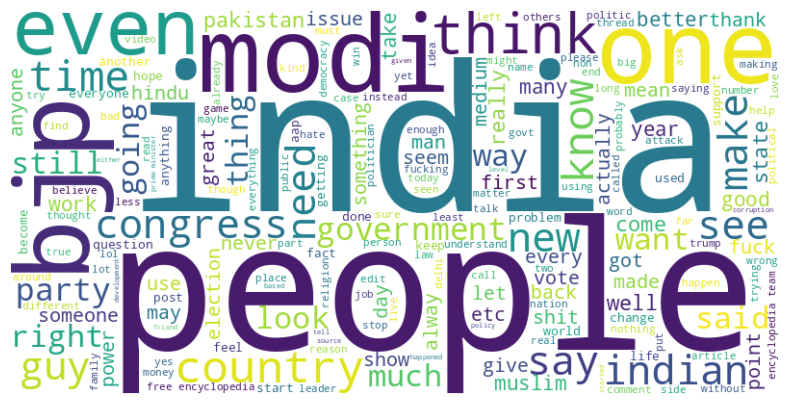

In [175]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(comment_sentiment['clean_comment'])

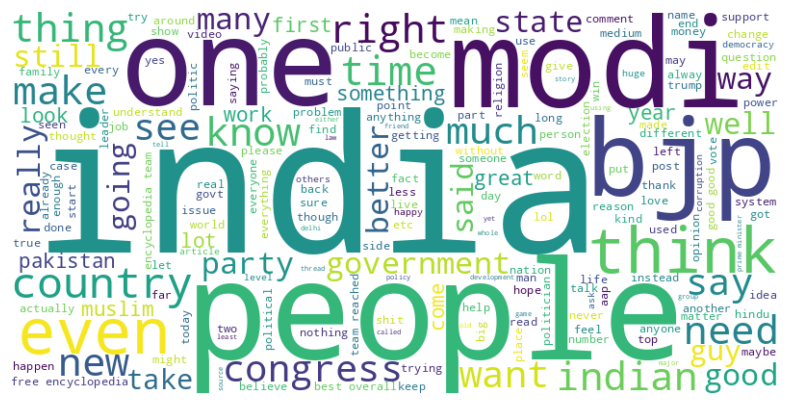

In [176]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(comment_sentiment[comment_sentiment['category'] == 1]['clean_comment'])

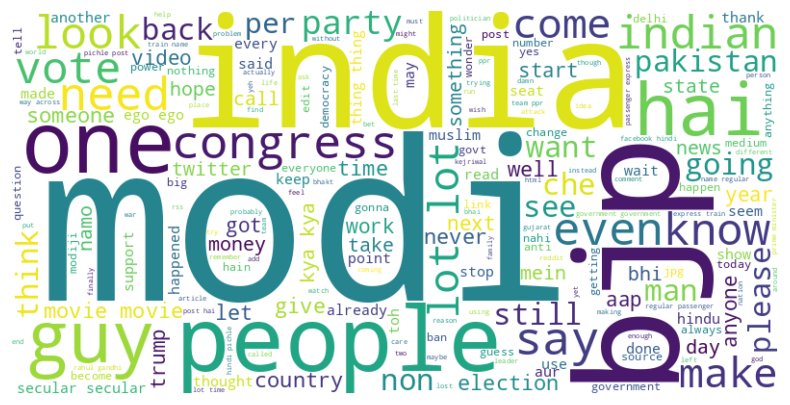

In [177]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(comment_sentiment[comment_sentiment['category'] == 0]['clean_comment'])

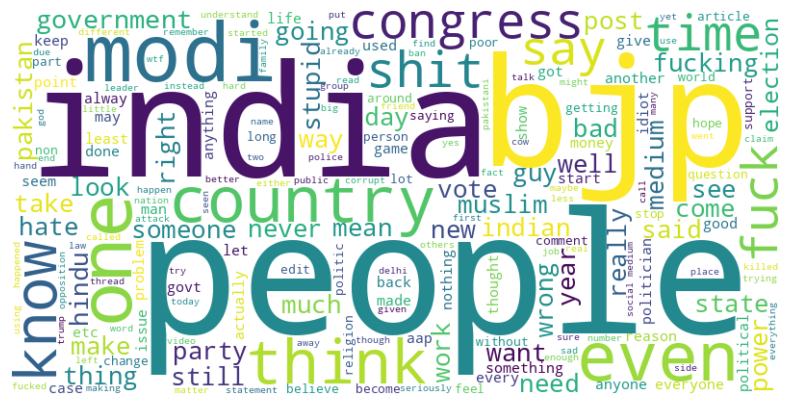

In [178]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(comment_sentiment[comment_sentiment['category'] == -1]['clean_comment'])

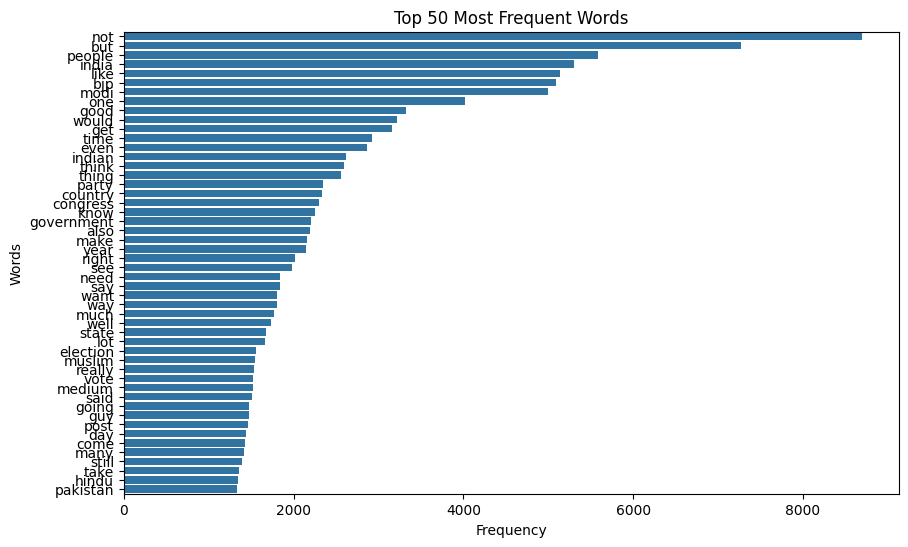

In [179]:
def plot_top_n_words(df, n=20):
    """Plot the top N most frequent words in the dataset."""
    # Flatten all words in the content column
    words = ' '.join(df['clean_comment']).split()

    # Get the top N most common words
    counter = Counter(words)
    most_common_words = counter.most_common(n)

    # Split the words and their counts for plotting
    words, counts = zip(*most_common_words)

    # Plot the top N words
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Example usage
plot_top_n_words(comment_sentiment, n=50)

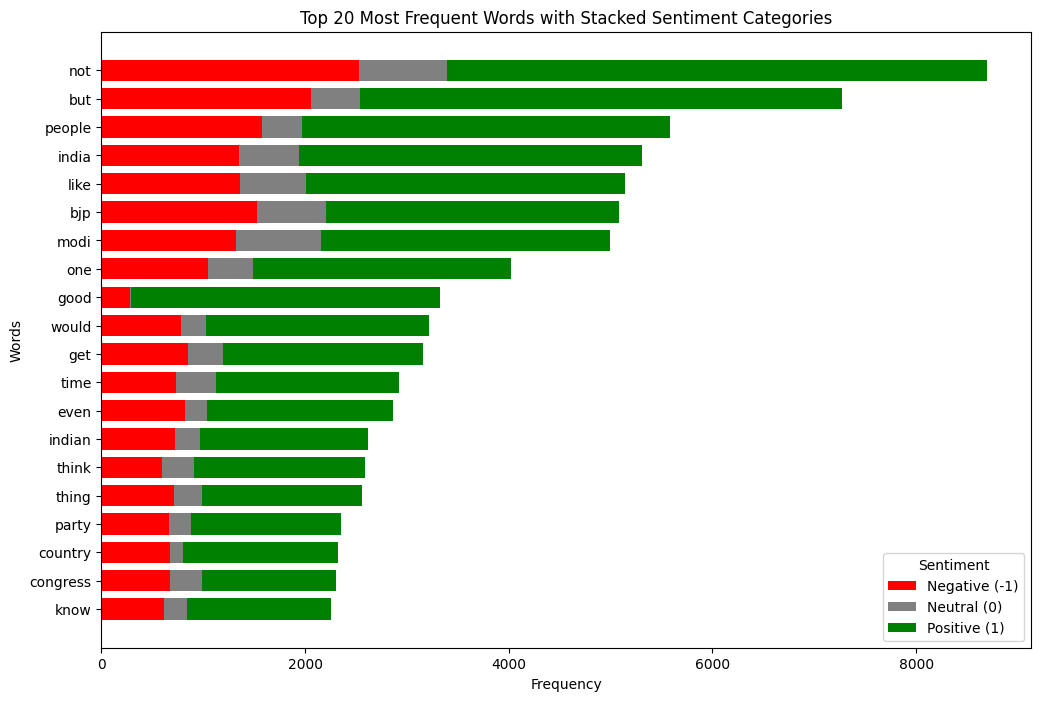

In [180]:
def plot_top_n_words_by_category(df, n=20, start=0):
    """Plot the top N most frequent words in the dataset with stacked hue based on sentiment category."""
    # Flatten all words in the content column and count their occurrences by category
    word_category_counts = {}

    for idx, row in df.iterrows():
        words = row['clean_comment'].split()
        category = row['category']  # Assuming 'category' column exists for -1, 0, 1 labels

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = { -1: 0, 0: 0, 1: 0 }  # Initialize counts for each sentiment category

            # Increment the count for the corresponding sentiment category
            word_category_counts[word][category] += 1

    # Get total counts across all categories for each word
    total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}

    # Get the top N most frequent words across all categories
    most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start:start+n]
    top_words = [word for word, _ in most_common_words]

    # Prepare data for plotting
    word_labels = top_words
    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts = [word_category_counts[word][0] for word in top_words]
    positive_counts = [word_category_counts[word][1] for word in top_words]

    # Plot the stacked bar chart
    plt.figure(figsize=(12, 8))
    bar_width = 0.75

    # Plot negative, neutral, and positive counts in a stacked manner
    plt.barh(word_labels, negative_counts, color='red', label='Negative (-1)', height=bar_width)
    plt.barh(word_labels, neutral_counts, left=negative_counts, color='gray', label='Neutral (0)', height=bar_width)
    plt.barh(word_labels, positive_counts, left=[i+j for i,j in zip(negative_counts, neutral_counts)], color='green', label='Positive (1)', height=bar_width)

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Frequent Words with Stacked Sentiment Categories')
    plt.legend(title='Sentiment', loc='lower right')
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency at the top
    plt.show()


plot_top_n_words_by_category(comment_sentiment, n=20)